In [14]:
%matplotlib ipympl
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# JSON files -> lists of dictionaries
with open('./uii_all_q_p.json') as json_file:
    uii_all_q_p = json.load(json_file)
    
with open('./uii_all_q.json') as json_file:
    uii_all_q = json.load(json_file)
    
with open('./uii_select_q_p.json') as json_file:
    uii_select_q_p = json.load(json_file)
    
with open('./uii_select_q.json') as json_file:
    uii_select_q = json.load(json_file)

In [15]:
# [{}] -> [[]] 

uii_data = []

for d in uii_all_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_all_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

for d in uii_all_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_all_q', name,f1_mean, roc_mean, precision_mean, recall_mean])
        
for d in uii_select_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_select_q', name,f1_mean, roc_mean, precision_mean, recall_mean])
        
for d in uii_select_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_select_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

In [16]:
# [[]] -> dataframe
df_uii_data = pd.DataFrame(uii_data, columns=['QuestionSet', 'Model', 'f1', 'roc_auc', 'precision', 'recall'])

In [17]:
df_uii_data['precision'].describe()

count    258.000000
mean       0.190052
std        0.123638
min        0.000000
25%        0.112604
50%        0.174782
75%        0.248065
max        0.523333
Name: precision, dtype: float64

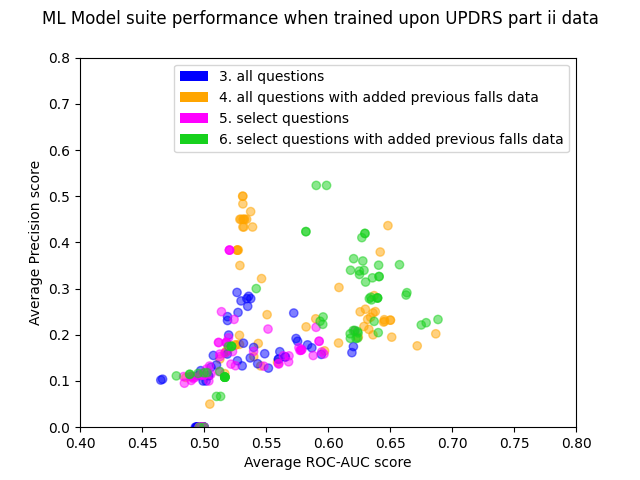

In [48]:
# UPDRS I plot

colors = {'uii_all_q':'blue', 'uii_all_q_p':'orange', 'uii_select_q':'magenta', 'uii_select_q_p':'#17d11d'}
markers = {'uii_all_q':'*', 'uii_all_q_p':'*', 'uii_select_q':'d', 'uii_select_q_p':'d'}

fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = fig.add_subplot(122)

# plot 1
# ax.set_title("ROC_AUC scores vs Precision scores")
ax.scatter(df_uii_data['roc_auc'], df_uii_data['precision'], c=df_uii_data['QuestionSet'].map(colors),label=['uii_all_q','uii_all_q_p'], alpha=0.5)
ax.set_xlim([0.4,0.8])
ax.set_ylim([0,0.8])
plt.ylabel("Average Precision score")
plt.xlabel("Average ROC-AUC score")


# # plot 2
# ax2.set_title("Precision scores vs Recall scores")
# ax2.scatter(df_uii_data['precision'], df_uii_data['recall'], c=df_uii_data['QuestionSet'].map(colors))
# ax2.set_xlim([0,1])
# ax2.set_ylim([0,1])

classes = ['3. all questions','4. all questions with added previous falls data', '5. select questions', '6. select questions with added previous falls data']
class_colours = ['blue','orange','magenta','#17d11d']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
ax.legend(recs,classes,loc=1)

plt.suptitle("ML Model suite performance when trained upon UPDRS part ii data")
plt.show()

In [42]:
df_uii_data.query("roc_auc > 0.65 and precision > 0.1")

# General Observations for UPDRS I:
# Nothing worth getting excited about
# + PREV_SIGFALL out performs w/o


,QuestionSet,Model,f1,roc_auc,precision,recall
0,uii_all_q_p,GNB1,0.292107,0.671944,0.176047,0.863889
1,uii_all_q_p,GNB2,0.318176,0.686927,0.202161,0.754167
2,uii_all_q_p,GNB3,0.296225,0.651366,0.194916,0.633333
59,uii_all_q_p,LOGREG7,0.317782,0.650290,0.231688,0.518056
60,uii_all_q_p,LOGREG8,0.317782,0.650290,0.231688,0.518056
194,uii_select_q_p,GNB3,0.331585,0.675224,0.221290,0.676667
195,uii_select_q_p,GNB4,0.355245,0.662967,0.286071,0.476667
202,uii_select_q_p,LDA2,0.365991,0.657642,0.351746,0.443333
212,uii_select_q_p,QDA3,0.337049,0.679157,0.226161,0.686667
220,uii_select_q_p,SVM2,0.363353,0.663628,0.291221,0.500000
